In [64]:
# Dla wybranego przez siebie zbioru danych, określonego w formie szeregów czasowych z >=5 kolumnami
# wykonaj analizę danych.
# Dane mogą być dowolne - zbiory danych powinny jedynie być inne niż te stosowane na laboratorium.
# Każdy zespół samodzielnie pozyskuje zbiory danych.

In [65]:
# 1) Wykonaj wykresy czasowe w formie interaktywnej z możliwością wyboru co najmniej dwóch serii danych na wykresie.
# Dla danych wykonaj wizualizację braków danych. Uzasadnij wybrane narzędzia, zinterpretuj rezultaty prac.

In [66]:
# https://www.kaggle.com/datasets/thedevastator/airlines-traffic-passenger-statistics?fbclid=IwAR03UL2sQTQvPPesps-KmjW3l1hTewtQJBiv3bONcKw-DJCo7dCyr6A_eKI


In [67]:
import pandas as pd
import plotly.express as px
import datetime

df = pd.read_csv('Air_Traffic_Passenger_Statistics.csv', index_col="index")
df_airlines = df.drop(columns=["Published Airline", "Published Airline IATA Code", "GEO Summary", "Price Category Code", "Terminal", "Boarding Area", "Adjusted Activity Type Code", "Adjusted Passenger Count", "Activity Type Code"])
df_airlines

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Passenger Count,Year,Month
index,,,,,,,
0,200507,ATA Airlines,TZ,US,27271,2005,July
1,200507,ATA Airlines,TZ,US,29131,2005,July
2,200507,ATA Airlines,TZ,US,5415,2005,July
3,200507,Air Canada,AC,Canada,35156,2005,July
4,200507,Air Canada,AC,Canada,34090,2005,July
...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,US,194636,2016,March
15003,201603,Virgin America,VX,Mexico,4189,2016,March
15004,201603,Virgin America,VX,Mexico,4693,2016,March


In [68]:
# View_all_airlines

grouped = df.groupby('Operating Airline').size().reset_index(name='count')

duplicates = grouped[grouped['count'] > 1]

print(duplicates)

    Operating Airline  count
0        ATA Airlines     44
1          Aer Lingus     98
2          Aeromexico    180
3          Air Berlin     36
4         Air Canada     366
..                ...    ...
72    Virgin Atlantic    258
73   WestJet Airlines    103
74      World Airways      3
75  XL Airways France     31
76       Xtra Airways      2

[76 rows x 2 columns]


In [69]:
name_list = duplicates['Operating Airline'].tolist()

In [70]:
name_list

['ATA Airlines',
 'Aer Lingus',
 'Aeromexico',
 'Air Berlin',
 'Air Canada ',
 'Air Canada Jazz',
 'Air China',
 'Air France',
 'Air India Limited',
 'Air New Zealand',
 'AirTran Airways',
 'Alaska Airlines',
 'All Nippon Airways',
 'Allegiant Air',
 'American Airlines',
 'American Eagle Airlines',
 'Ameriflight',
 'Asiana Airlines',
 'Atlantic Southeast Airlines',
 'Atlas Air, Inc',
 'BelAir Airlines',
 'British Airways',
 'COPA Airlines, Inc.',
 'Cathay Pacific',
 'China Airlines',
 'China Eastern',
 'China Southern',
 'Compass Airlines',
 'Delta Air Lines',
 'EVA Airways',
 'Emirates ',
 'Etihad Airways',
 'Evergreen International Airlines',
 'ExpressJet Airlines',
 'Frontier Airlines',
 'Hawaiian Airlines',
 'Horizon Air ',
 'Icelandair',
 'Independence Air',
 'Japan Airlines',
 'Jet Airways',
 'JetBlue Airways ',
 'KLM Royal Dutch Airlines',
 'Korean Air Lines',
 'LAN Peru',
 'Lufthansa German Airlines',
 'Mesa Airlines',
 'Mesaba Airlines',
 'Mexicana Airlines',
 'Miami Air Inter

In [72]:
# Let's select a few airlines to plot its data
selected_airlines = ["China Airlines", "Air France", "Virgin Atlantic", "British Airways", "Turkish Airlines", "Asiana Airlines", "Korean Air Lines", "Lufthansa German Airlines","EVA Airways","Alaska Airlines","WestJet Airlines"]

df_airlines_selected = df_airlines[df_airlines["Operating Airline"].isin(selected_airlines)]
df_airlines_selected

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Passenger Count,Year,Month
index,,,,,,,
7,200507,Air France,AF,Europe,12050,2005,July
8,200507,Air France,AF,Europe,11638,2005,July
13,200507,Alaska Airlines,AS,US,36641,2005,July
14,200507,Alaska Airlines,AS,US,39379,2005,July
15,200507,Alaska Airlines,AS,US,3678,2005,July
...,...,...,...,...,...,...,...
14945,201603,Lufthansa German Airlines,LH,Europe,21710,2016,March
14974,201603,Turkish Airlines,TK,Europe,8865,2016,March
14975,201603,Turkish Airlines,TK,Europe,8729,2016,March


In [73]:
df_airlines_grouped = df_airlines_selected.groupby(["Activity Period", "Operating Airline IATA Code", "Operating Airline", "Year", "Month"], as_index=False)
df_airlines_prepared = df_airlines_grouped["Passenger Count"].sum()
df_airlines_prepared

,Activity Period,Operating Airline IATA Code,Operating Airline,Year,Month,Passenger Count
0,200507,AF,Air France,2005,July,23688
1,200507,AS,Alaska Airlines,2005,July,115793
2,200507,BA,British Airways,2005,July,42318
3,200507,BR,EVA Airways,2005,July,26274
4,200507,CI,China Airlines,2005,July,24893
...,...,...,...,...,...,...
1220,201603,KE,Korean Air Lines,2016,March,15556
1221,201603,LH,Lufthansa German Airlines,2016,March,43685
1222,201603,OZ,Asiana Airlines,2016,March,14105
1223,201603,TK,Turkish Airlines,2016,March,17594


In [74]:
df_converted = df_airlines_prepared.pivot(index='Activity Period', columns='Operating Airline', values='Passenger Count').rename_axis(None, axis=1).reset_index()
df_converted['Activity Period'] = df_converted["Activity Period"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m').strftime("%Y-%m"))
df_converted

,Activity Period,Air France,Alaska Airlines,Asiana Airlines,British Airways,China Airlines,EVA Airways,Korean Air Lines,Lufthansa German Airlines,Turkish Airlines,Virgin Atlantic,WestJet Airlines
0,2005-07,23688.0,115793.0,9785.0,42318.0,24893.0,26274.0,11799.0,42900.0,NaN,22455.0,4691.0
1,2005-08,22961.0,118625.0,7475.0,40396.0,25582.0,25474.0,16020.0,43393.0,NaN,21757.0,4551.0
2,2005-09,22068.0,97905.0,9932.0,41090.0,18640.0,20683.0,7792.0,41914.0,NaN,22707.0,4047.0
3,2005-10,21311.0,97526.0,10083.0,38441.0,19173.0,21433.0,7927.0,40318.0,NaN,19355.0,2784.0
4,2005-11,14695.0,106732.0,9383.0,30818.0,19188.0,22505.0,8923.0,30530.0,NaN,16195.0,2551.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124,2015-11,17729.0,113885.0,14615.0,38699.0,16353.0,32301.0,13473.0,33672.0,17549.0,19159.0,NaN
125,2015-12,17930.0,114725.0,15492.0,36013.0,18021.0,34886.0,18002.0,38846.0,16870.0,21571.0,NaN
126,2016-01,17853.0,109469.0,15520.0,38399.0,19993.0,36503.0,19461.0,40844.0,17199.0,20948.0,NaN
127,2016-02,15876.0,109740.0,14747.0,33703.0,17481.0,31886.0,17144.0,34849.0,15800.0,16035.0,NaN


In [75]:
fig = px.line(df_converted, x="Activity Period", y=df_converted.columns,
              hover_data={"Activity Period": "|%B, %Y"},
              title='Airline traffic in US')
fig.update_xaxes(
    dtick="M4",
    tickformat="%B %Y")
fig.show()

In [13]:
# !pip install missingno

In [76]:
import missingno as msno

In [77]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity Period            129 non-null    object 
 1   Air France                 129 non-null    float64
 2   Alaska Airlines            129 non-null    float64
 3   Asiana Airlines            129 non-null    float64
 4   British Airways            129 non-null    float64
 5   China Airlines             129 non-null    float64
 6   EVA Airways                129 non-null    float64
 7   Korean Air Lines           129 non-null    float64
 8   Lufthansa German Airlines  129 non-null    float64
 9   Turkish Airlines           12 non-null     float64
 10  Virgin Atlantic            129 non-null    float64
 11  WestJet Airlines           52 non-null     float64
dtypes: float64(11), object(1)
memory usage: 12.2+ KB


In [78]:
df_converted.isna().sum()

Activity Period                0
Air France                     0
Alaska Airlines                0
Asiana Airlines                0
British Airways                0
China Airlines                 0
EVA Airways                    0
Korean Air Lines               0
Lufthansa German Airlines      0
Turkish Airlines             117
Virgin Atlantic                0
WestJet Airlines              77
dtype: int64

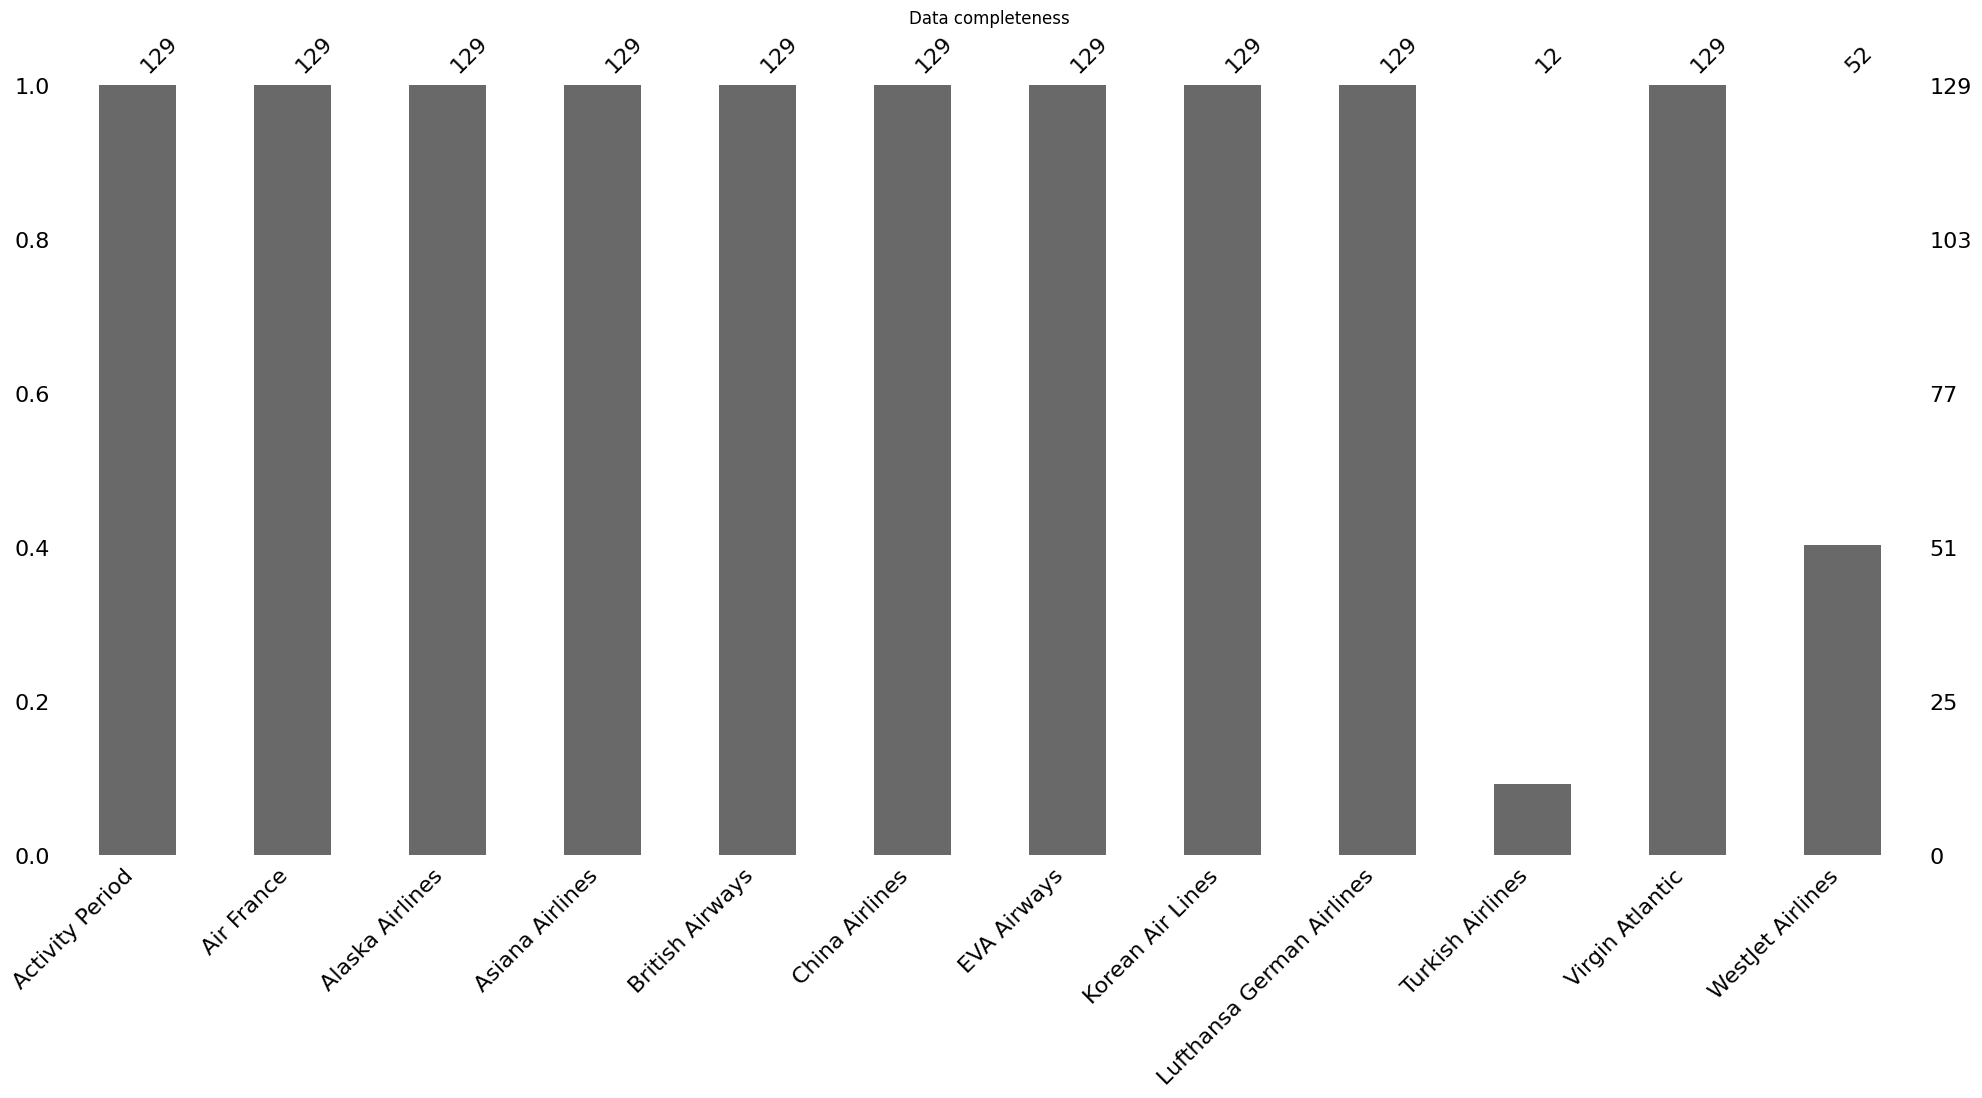

In [79]:
import matplotlib.pyplot as plt
msno.bar(df_converted)
plt.title('Data completeness')

# show the plot
plt.show()

In [80]:

df = pd.DataFrame([])

def add_airline(name_of_airline, df_converted, df):
    True_values = []# Places in columns where values are not NaN
    for row in df_converted[name_of_airline].isna():
        True_values.append(not(row))

    starts = []
    ends = []
    run_start = None

    for i in range(len(True_values)):
        if True_values[i] and run_start is None:
            # Start of a new run of True values
            run_start = i
        elif not True_values[i] and run_start is not None:
            # End of a run of True values
            starts.append(run_start)
            ends.append(i - 1)
            run_start = None

    # If the last run of True values extends to the end of the list, add it now
    if run_start is not None:
        starts.append(run_start)
        ends.append(len(True_values) - 1)


    start_values = [] # List with correct start dates
    
    for x in starts:
        start_values.append(df_converted.iloc[x, df_converted.columns.get_loc("Activity Period")])


    end_values = [] # List with correct end dates

    for x in ends:
        end_values.append(df_converted.iloc[x, df_converted.columns.get_loc("Activity Period")])


    df = pd.DataFrame([])

    for x in range(len(starts)):
        df = df.append(dict(Airlines_data=name_of_airline, Start=start_values[x], Finish=end_values[x]), ignore_index=True)
    return df

In [81]:
df = pd.DataFrame([])
df = df.append(add_airline("WestJet Airlines", df_converted, df), ignore_index=True)
df = df.append(add_airline("China Airlines", df_converted, df), ignore_index=True)
df = df.append(add_airline("Air France", df_converted, df), ignore_index=True)
df = df.append(add_airline("Virgin Atlantic", df_converted, df), ignore_index=True)
df = df.append(add_airline("British Airways", df_converted, df), ignore_index=True)
df = df.append(add_airline("Turkish Airlines", df_converted, df), ignore_index=True)
df = df.append(add_airline("Asiana Airlines", df_converted, df), ignore_index=True)
df = df.append(add_airline("Korean Air Lines", df_converted, df), ignore_index=True)
df = df.append(add_airline("Lufthansa German Airlines", df_converted, df), ignore_index=True)
df = df.append(add_airline("EVA Airways", df_converted, df), ignore_index=True)
df = df.append(add_airline("Alaska Airlines", df_converted, df), ignore_index=True)
df


,Airlines_data,Start,Finish
0,WestJet Airlines,2005-07,2006-01
1,WestJet Airlines,2009-06,2009-10
2,WestJet Airlines,2010-05,2010-10
3,WestJet Airlines,2011-05,2011-10
4,WestJet Airlines,2012-02,2012-02
5,WestJet Airlines,2012-04,2012-10
6,WestJet Airlines,2013-04,2013-10
7,WestJet Airlines,2014-04,2014-10
8,WestJet Airlines,2015-05,2015-10
9,China Airlines,2005-07,2016-03


In [82]:
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Airlines_data", color = "Airlines_data", title="Data completeness")
fig.update_yaxes(autorange="reversed") # otherwise tasksare listed from the bottom up
fig.show()